# Exploratory Data Analysis

## Load Processed Data

In [4]:
import boto3
import pandas as pd
from io import StringIO

# Define S3 bucket and processed dataset folder
s3_bucket_name = "network-anomaly-dataset-001aefd6"
processed_data_prefix = "processed/"  # Corrected folder name

# List of processed files
processed_files = [
    "processed_Monday-WorkingHours.pcap_ISCX.csv",
    "processed_Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv",
    "processed_Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv",
    "processed_Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv",
    "processed_Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv"
]

# Initialize S3 client
s3 = boto3.client('s3')

# Load datasets into DataFrames
dfs = {}
for file_name in processed_files:
    file_path = processed_data_prefix + file_name  # Corrected file path
    try:
        obj = s3.get_object(Bucket=s3_bucket_name, Key=file_path)
        df = pd.read_csv(StringIO(obj['Body'].read().decode('utf-8')))
        dfs[file_name] = df
        print(f" Loaded {file_name} successfully!")
    except Exception as e:
        print(f"❌ Error loading {file_name}: {e}")

print("All processed datasets loaded.")


 Loaded processed_Monday-WorkingHours.pcap_ISCX.csv successfully!
 Loaded processed_Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv successfully!
 Loaded processed_Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv successfully!
 Loaded processed_Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv successfully!
 Loaded processed_Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv successfully!
All processed datasets loaded.


# Exploratory Data Analysis

In [5]:
# check basic info 
for name, df in dfs.items():
    print(f"\n Dataset: {name}")
    print(f"Shape: {df.shape}")  # Only print shape
    print(f"Columns with Missing Values:\n{df.isnull().sum()[df.isnull().sum() > 0]}")
    print(f"Unique Labels: {df['Label'].unique()}\n")



 Dataset: processed_Monday-WorkingHours.pcap_ISCX.csv
Shape: (78701, 79)
Columns with Missing Values:
Flow Bytes/s    15
dtype: int64
Unique Labels: [0]


 Dataset: processed_Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Shape: (94342, 79)
Columns with Missing Values:
Flow Bytes/s    3
dtype: int64
Unique Labels: [0 1]


 Dataset: processed_Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Shape: (110641, 79)
Columns with Missing Values:
Flow Bytes/s    8
dtype: int64
Unique Labels: [0 2]


 Dataset: processed_Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Shape: (79071, 79)
Columns with Missing Values:
Flow Bytes/s    8
dtype: int64
Unique Labels: [0 3]


 Dataset: processed_Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Shape: (89472, 79)
Columns with Missing Values:
Flow Bytes/s    3
dtype: int64
Unique Labels: [0 4]



In [7]:
# summary of stats 

columns_to_check = ["Flow Duration", "Total Fwd Packets", "Total Backward Packets", "Label"]

for name, df in dfs.items():
    print(f"\n Summary for {name}:")
    print(df[columns_to_check].describe())  # Show summary for selected columns




 Summary for processed_Monday-WorkingHours.pcap_ISCX.csv:
       Flow Duration  Total Fwd Packets  Total Backward Packets    Label
count   7.870100e+04       78701.000000            78701.000000  78701.0
mean    1.971270e+07          35.017522               43.159947      0.0
std     3.675228e+07        2272.758370             2991.473675      0.0
min    -1.000000e+00           1.000000                0.000000      0.0
25%     2.330500e+04           2.000000                1.000000      0.0
50%     1.827620e+05           3.000000                2.000000      0.0
75%     1.066404e+07           8.000000                6.000000      0.0
max     1.199999e+08      219759.000000           291922.000000      0.0

 Summary for processed_Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv:
       Flow Duration  Total Fwd Packets  Total Backward Packets         Label
count   9.434200e+04       94342.000000            94342.000000  94342.000000
mean    1.560871e+07           4.918647               

In [12]:
# display dataframe 

for name, df in dfs.items():
    print(f"\n {name} - Shape: {df.shape}")
    print(df.head())  # Display the first 5 rows



 processed_Monday-WorkingHours.pcap_ISCX.csv - Shape: (78701, 79)
   Destination Port  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0             49188              4                  2                       0   
1             49188              1                  2                       0   
2             49188              1                  2                       0   
3             49188              1                  2                       0   
4             49486              3                  2                       0   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                           12                            0   
1                           12                            0   
2                           12                            0   
3                           12                            0   
4                           12                            0   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length 

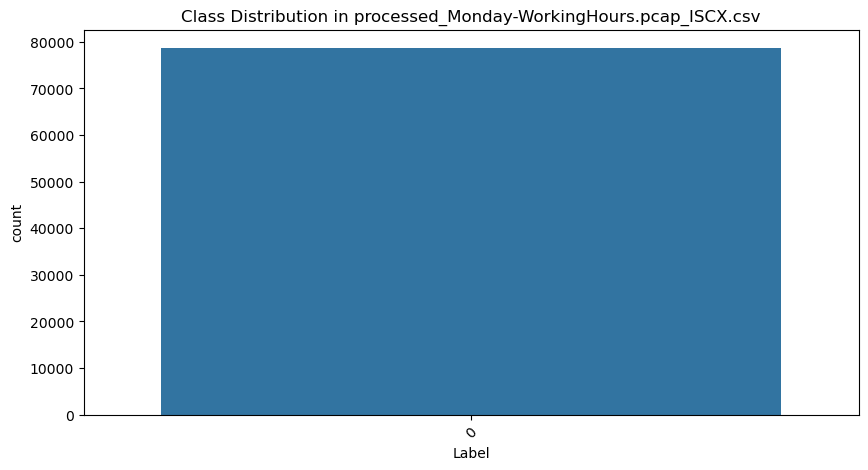

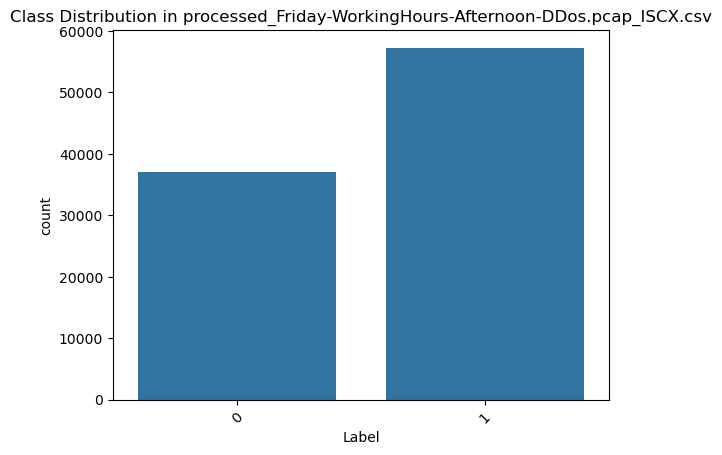

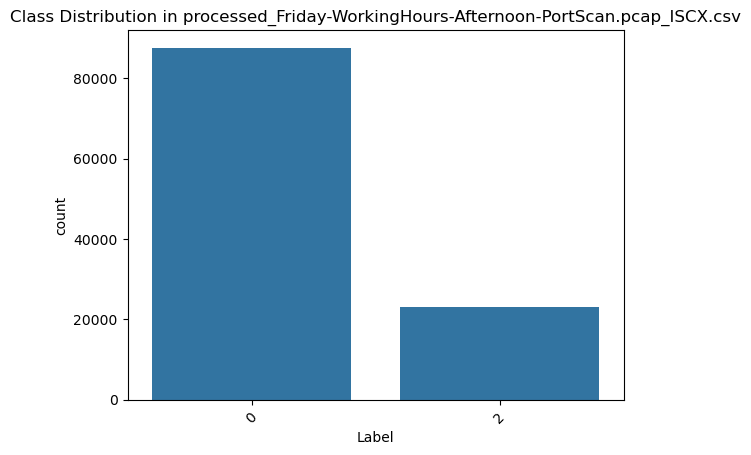

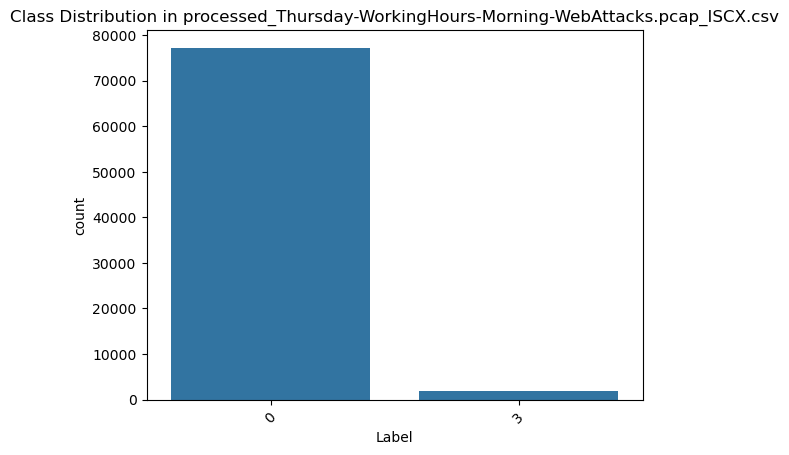

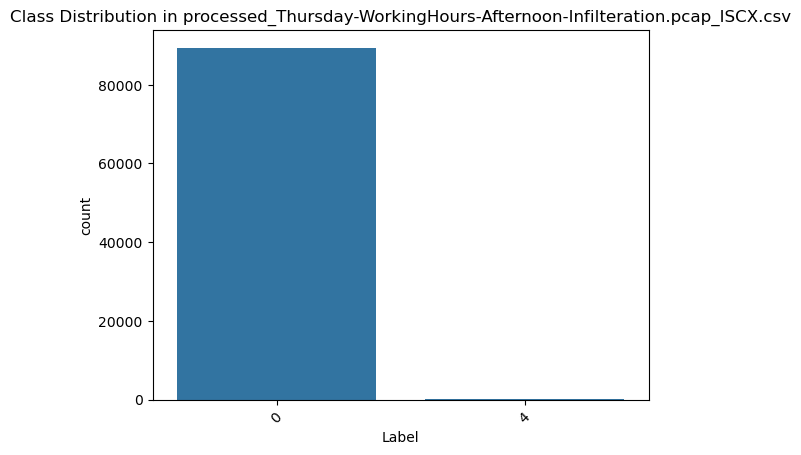

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
for name, df in dfs.items():
    plt.xticks(rotation=45)
    sns.countplot(x=df['Label'])
    plt.title(f"Class Distribution in {name}")
    plt.show()


#### Key Observations from the EDA

##### Dataset Overview:

    The processed datasets contain 79 features each.
    The datasets represent network traffic flows labeled as either benign (normal) or different types of attacks.
    The label column is numeric (encoded), ensuring models can process it correctly.
  
##### Class Distribution (as seen in the plots):

    Monday-WorkingHours.pcap_ISCX.csv:
    - Almost all samples belong to class 0 (Benign).
    - This dataset can be useful for learning normal traffic patterns.
  
    Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv:

    - A mix of normal (0) and DDoS attack (1) traffic.
    - This dataset is valuable for distinguishing between DDoS attacks and normal traffic.

    Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv:

  
    - Heavily skewed towards normal (0) traffic, with fewer instances of PortScan (2).
    -Highlights the challenge of detecting Port Scanning attacks due to class imbalance.

    Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv:
    - Mostly normal (0) traffic with a small number of Web Attacks (3).
    - The small attack proportion suggests that additional resampling techniques (e.g., SMOTE, class weighting) may be needed during modeling.
    
    Thursday-WorkingHours-Afternoon-Infiltration.pcap_ISCX.csv:
    - Predominantly normal (0) with very few instances of Infiltration (4).
    - This class imbalance may require special attention during training to avoid models biased toward benign traffic.

##### Feature Statistics & Distributions:

    - Some features, like flow duration, packet length, and header size, show high variance.
    - Certain datasets have negative or zero values, which may need further cleaning.
    - Some flow-based features (e.g., Flow Bytes/s, Flow Packets/s) contain missing or extreme values, which might need transformation or imputation.
    - Importance of These Findings
    - Class Imbalance: The datasets have varying distributions of attack types, meaning models trained on them need to handle imbalanced classification carefully.
    - Feature Engineering Needs:
    - Scaling may be necessary since many features span different ranges.
    - Removing outliers and handling missing values could improve model accuracy.
    - Dataset-Specific Modeling Approaches:
    - Some datasets (like Monday’s) may be useful for anomaly detection (since they contain mostly benign traffic).
    - Others (like Friday’s DDoS dataset) are useful for supervised classification with attack-labeled samples.
    - Next Steps
    - Address imbalanced datasets using techniques like oversampling, undersampling, or class-weighted training.
    - Normalize features to improve model performance.
    - Select the most relevant features to reduce dimensionality.
    - Evaluate different machine learning models (Random Forest, XGBoost, Neural Networks) on a validation set.


In [17]:
for name, df in dfs.items():
    missing = df.isnull().sum()
    print(f"\n Missing Values in {name}:\n{missing[missing > 0]}")



 Missing Values in processed_Monday-WorkingHours.pcap_ISCX.csv:
Flow Bytes/s    15
dtype: int64

 Missing Values in processed_Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv:
Flow Bytes/s    3
dtype: int64

 Missing Values in processed_Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv:
Flow Bytes/s    8
dtype: int64

 Missing Values in processed_Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv:
Flow Bytes/s    8
dtype: int64

 Missing Values in processed_Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv:
Flow Bytes/s    3
dtype: int64
